<a href="https://colab.research.google.com/github/jalbury/machine-learning/blob/master/HW_2/HW2_Problem3_John_Albury.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 2, Problem 3

## Description

In this problem, we are asked to calculate and display the average of each MNIST digit. That is, for each digit $i$ (where $i=0, 1, ..., 9$), we calculate and display the pixel-wise average of all images that are labled as digit $i$.

To solve this problem, I used the `mean` method from the `numpy` library. By default, this method will compute the average value of all elements in a flattened version of the given array, resulting in a scalar. However, for this problem, we want to obtain a pixel-wise (more generally, element-wise) average of groups of images in the MNIST data set. Obtaining an element-wise average can be done by specifying the axis along which to compute the average (source: [SciPy.org](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html)). Specifying `axis=0` tells the `mean` method to compute the average along the first axis of the array, which in our case contains the images.

My approach to this problem was as follows: group the images in the MNIST data set by the digit they represent, then use `np.mean` (specifying `axis=0` to get the pixel-wise average) on each group of images to get the average image of that group of images.

To display the average digits, I used the `matplotlib` library. The code used to display the digits is based on the code in [Dr. Wocjan's notebook about the MNIST digits data set](https://github.com/schneider128k/machine_learning_course/blob/master/mnist_digits_data_set.ipynb).

## Solution

### Imports

In [0]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

### Load MNIST data set

In [0]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

### Calculate average MNIST digits

In [0]:
# loops through all images/labels given and adds each image
# to the list at the index of the digit it represents
def group_images_by_digit(images, labels, digits):
  for image, label in zip(images, labels):
    if digits[label] is None:
      digits[label] = [image]
    else:
      digits[label].append(image)

# digits is a list where each index contains a list containing
# all images that represent that digit (for example, index 0
# contains a list of all images that represent the digit 0)
digits = [None] * 10

# put training images into digits list
group_images_by_digit(train_images, train_labels, digits)
# put testing images into digits list
group_images_by_digit(test_images, test_labels, digits)

# compute the pixel-wise average image for each digit
for i in range(10):
  digits[i] = np.mean(np.array(digits[i]), axis=0).astype(np.uint8)

### Display average MNIST digits

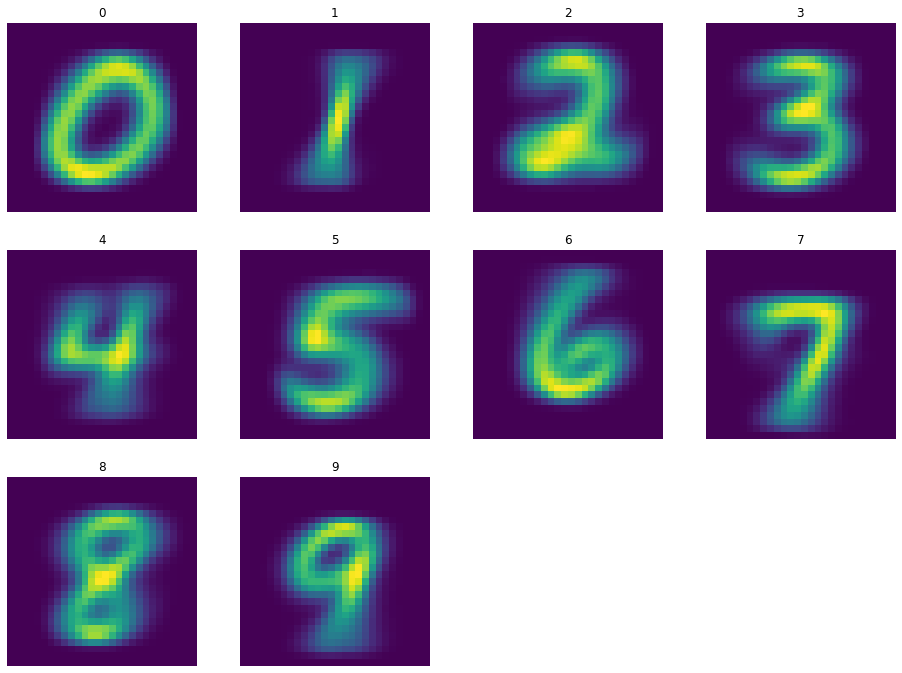

In [10]:
plt.figure(figsize=(16, 16))
for i in range(10):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(digits[i])
    plt.title(i)
    plt.axis('off')